## Python statistics essential training - 03_03_histograms


Standard imports


In [1]:
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as pp

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

In [4]:
china1965 = pd.read_csv("income-1965-china.csv")
china2015 = pd.read_csv("income-2015-china.csv")
usa1965 = pd.read_csv("income-1965-usa.csv")
usa2015 = pd.read_csv("income-2015-usa.csv")

In [5]:
china1965.head()

,income,log10_income
0,1.026259,0.011257
1,0.912053,-0.039980
2,0.110699,-0.955857
3,0.469659,-0.328217
4,0.374626,-0.426402


<Axes: >

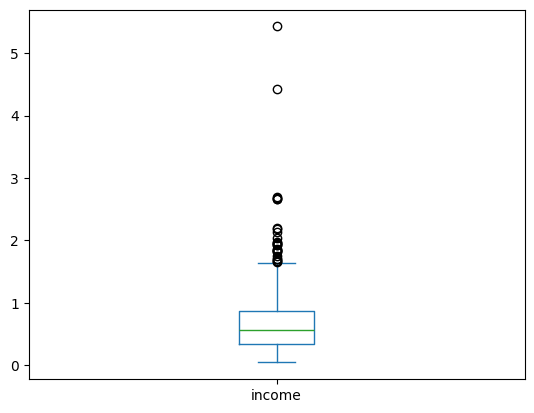

In [7]:
china1965.income.plot(kind="box")

<Axes: >

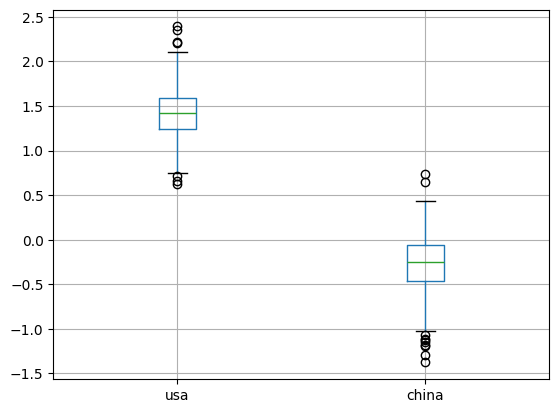

In [9]:
pd.DataFrame({'usa': usa1965.log10_income,
             "china": china1965.log10_income}).boxplot()

histogram


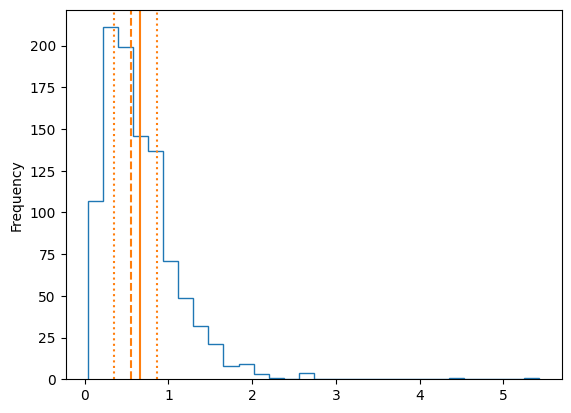

In [18]:
china1965.income.plot(kind='hist', histtype='step', bins=30)

pp.axvline(china1965.income.mean(), c='C1', )
pp.axvline(china1965.income.median(), c='C1', linestyle='--')
pp.axvline(china1965.income.quantile(0.25), c='C1', linestyle='dotted')
pp.axvline(china1965.income.quantile(0.75), c='C1', linestyle='dotted')

(0.0, 3.0, 0.0, 1.2342999882944063)

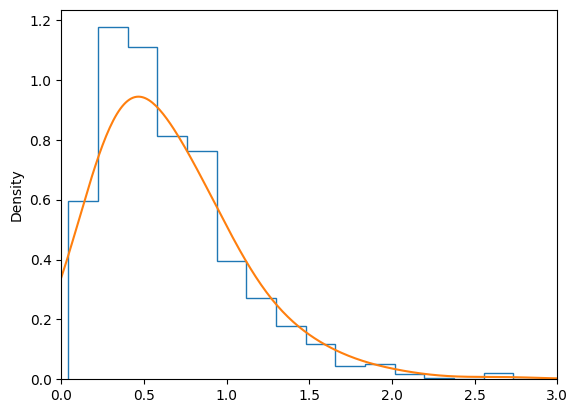

In [22]:
china1965.income.plot(kind='hist', histtype='step', bins=30, density=True)
china1965.income.plot.density(bw_method=0.5)

pp.axis(xmin=0, xmax=3)


# pp.axvline(china1965.income.mean(), c='C1', )
# pp.axvline(china1965.income.median(), c='C1',linestyle='--')
# pp.axvline(china1965.income.quantile(0.25), c='C1',linestyle='dotted')
# pp.axvline(china1965.income.quantile(0.75), c='C1',linestyle='dotted')

([<matplotlib.axis.XTick at 0x205e2eed7d0>,
 [Text(-0.6020599913279624, 0, '0.25'),
  Text(-0.3010299956639812, 0, '0.5'),
  Text(0.0, 0, '1'),
  Text(0.3010299956639812, 0, '2'),
  Text(0.6020599913279624, 0, '4'),
  Text(0.9030899869919435, 0, '8'),
  Text(1.2041199826559248, 0, '16'),
  Text(1.505149978319906, 0, '32'),
  Text(1.806179973983887, 0, '64')])

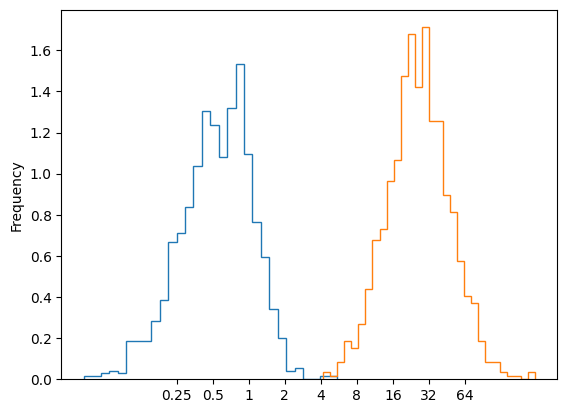

In [25]:
china1965.log10_income.plot(
    kind='hist', histtype='step', bins=30, density=True)
usa1965.log10_income.plot(kind='hist', histtype='step', bins=30, density=True)

levels = [0.25, 0.5, 1, 2, 4, 8, 16, 32, 64]
pp.xticks(np.log10(levels), levels)

([<matplotlib.axis.XTick at 0x205e2fbd4d0>,
 [Text(-0.6020599913279624, 0, '0.25'),
  Text(-0.3010299956639812, 0, '0.5'),
  Text(0.0, 0, '1'),
  Text(0.3010299956639812, 0, '2'),
  Text(0.6020599913279624, 0, '4'),
  Text(0.9030899869919435, 0, '8'),
  Text(1.2041199826559248, 0, '16'),
  Text(1.505149978319906, 0, '32'),
  Text(1.806179973983887, 0, '64')])

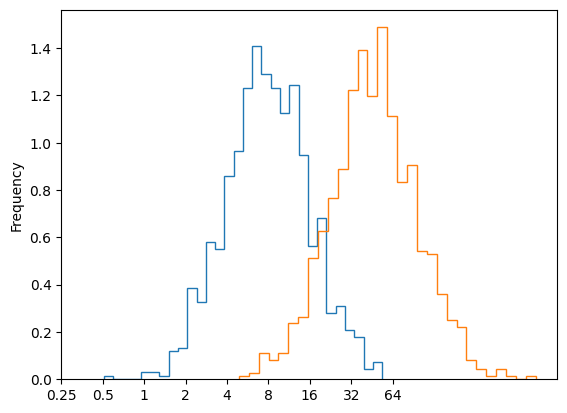

In [26]:
china2015.log10_income.plot(
    kind='hist', histtype='step', bins=30, density=True)
usa2015.log10_income.plot(kind='hist', histtype='step', bins=30, density=True)

levels = [0.25, 0.5, 1, 2, 4, 8, 16, 32, 64]
pp.xticks(np.log10(levels), levels)

In [27]:
gm = pd.read_csv("./gapminder.csv")

In [32]:
gm.query('country == "China" and year == 2015').population

2834    1.376049e+09
Name: population, dtype: float64

In [35]:
china_pop_2015 = float(
    (gm.query('country == "China" and year == 2015').population.iloc[0]))
usa_pop_2015 = float(
    (gm.query('country == "United States" and year == 2015').population.iloc[0]))

china_pop_2015, usa_pop_2015

(1376048943.0, 321773631.0)

In [36]:
china2015["weight"] = china_pop_2015 / len(china2015)
usa2015["weight"] = usa_pop_2015 / len(usa2015)

In [37]:
china2015.head(20)

,income,log10_income,weight
0,4.499303,0.653145,1376048.943
1,13.727408,1.137589,1376048.943
2,7.075421,0.849752,1376048.943
3,4.667088,0.669046,1376048.943
4,6.456985,0.810030,1376048.943
5,9.634854,0.983845,1376048.943
6,17.842285,1.251450,1376048.943
7,10.703960,1.029544,1376048.943
8,3.028191,0.481183,1376048.943
9,6.563022,0.817104,1376048.943


now with the weights, we dont need density anymore. and this will show both countries regarding their population


Text(0.5, 0, 'income (USD/day)')

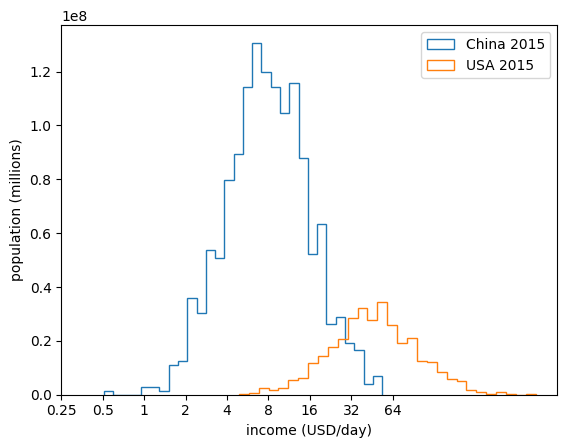

In [43]:
china2015.log10_income.plot(kind='hist', histtype='step',
                            bins=30, weights=china2015.weight, label='China 2015')
usa2015.log10_income.plot(kind='hist', histtype='step',
                          bins=30, weights=usa2015.weight, label='USA 2015')

levels = [0.25, 0.5, 1, 2, 4, 8, 16, 32, 64]
pp.xticks(np.log10(levels), levels)
pp.legend()
pp.ylabel('population (millions)')
pp.xlabel('income (USD/day)')